In [1]:
import random as rnd
import pandas as pd

n = 150_000

pop = [rnd.random() for k in range(n)]

lista = []

for k in range(n):
    lista.append(pd.DataFrame([sorted(rnd.sample(pop,5))]))

df = pd.concat(lista, axis=0, ignore_index=True)

x5_m = len(df[df[4]<0.5])
medx3 = df[2].mean()
    
print(f"Das {n} amostras de {x5_m} tiveram x[5] menor que 0.5, um percentual de {x5_m/n:.4%}")

print(f"Já x[3] teve valor médio de {medx3:.4%}")

Das 150000 amostras de 4753 tiveram x[5] menor que 0.5, um percentual de 3.1687%
Já x[3] teve valor médio de 49.8371%


In [2]:
df.head()

,0,1,2,3,4
0,0.127141,0.382884,0.491962,0.764232,0.829586
1,0.270095,0.339753,0.694608,0.762478,0.773621
2,0.062699,0.104563,0.153076,0.495916,0.980741
3,0.110979,0.117662,0.241210,0.312510,0.448563
4,0.196336,0.268687,0.392895,0.402243,0.565842


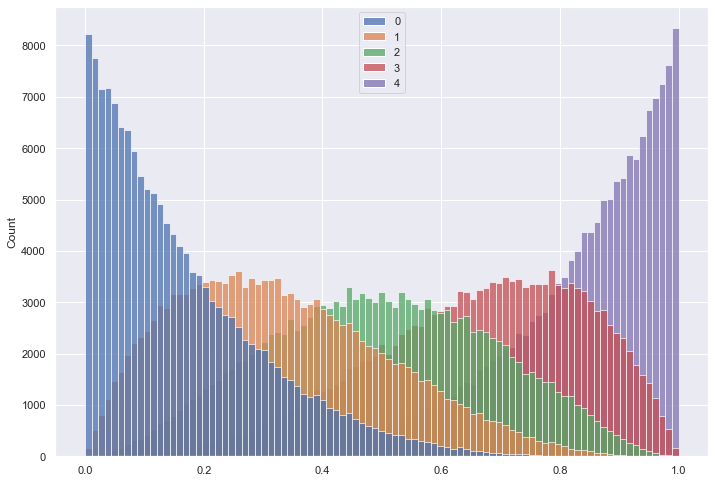

In [3]:
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.histplot(data=df);

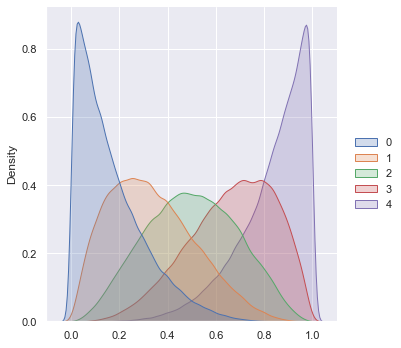

In [4]:
sns.displot(df,kind="kde", fill=True);